<a href="https://colab.research.google.com/github/airenare/pneumonia_xray/blob/main/notebooks/03_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest X-Ray CNN to Detect Pneumonia
## Testing models

## Import libraries

In [133]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

from google.colab import drive
import os

## Import all models

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
project_path = r'/content/drive/MyDrive/Springboard/SPRINGBOARD\ -\ Final\ Capstone\ Project'

In [18]:
# Unzip archives
!unzip {project_path}/model_1.zip -d {project_path}/models
!unzip {project_path}/model_2.zip -d {project_path}/models
!unzip {project_path}/model_3.zip -d {project_path}/models
!unzip {project_path}/model_4.zip -d {project_path}/models

Archive:  /content/drive/MyDrive/Springboard/SPRINGBOARD - Final Capstone Project/model_1.zip
   creating: /content/drive/MyDrive/Springboard/SPRINGBOARD - Final Capstone Project/models/model_1/
  inflating: /content/drive/MyDrive/Springboard/SPRINGBOARD - Final Capstone Project/models/model_1/model_weights.h5  
  inflating: /content/drive/MyDrive/Springboard/SPRINGBOARD - Final Capstone Project/models/model_1/model.json  
  inflating: /content/drive/MyDrive/Springboard/SPRINGBOARD - Final Capstone Project/models/model_1/model.keras  
Archive:  /content/drive/MyDrive/Springboard/SPRINGBOARD - Final Capstone Project/model_2.zip
   creating: /content/drive/MyDrive/Springboard/SPRINGBOARD - Final Capstone Project/models/model_2/
  inflating: /content/drive/MyDrive/Springboard/SPRINGBOARD - Final Capstone Project/models/model_2/model_weights.h5  
  inflating: /content/drive/MyDrive/Springboard/SPRINGBOARD - Final Capstone Project/models/model_2/model.json  
  inflating: /content/drive/MyDr

In [21]:
!ls {project_path}/models/model_1

model.json  model.keras  model_weights.h5


In [28]:
model_1 = keras.models.load_model(f'{project_path}/models/model_1/model.keras')
model_2 = keras.models.load_model(f'{project_path}/models/model_2/model.keras')
model_3 = keras.models.load_model(f'{project_path}/models/model_3/model.keras')
model_4 = keras.models.load_model(f'{project_path}/models/model_4/model.keras')

## Create a large test set

In [32]:
# Function to get datasets from Google Drive
def get_drive_dataset(dataset_path, download_folder,
                      delete_zip=True, remove_MACOSX=True):
  """
  Downloads a dataset from Google Drive.

  Args:
    dataset_path: The path to the dataset in Google Drive.
    download_folder: The folder where the dataset will be downloaded (no trailing /)
  """

  # Create download folder if does not exist
  if not os.path.exists(download_folder):
    !mkdir {download_folder}
    print(f'Download folder {download_folder} created.')
  else:
    print(f'Download folder {download_folder} already exists.')

  # Check if the dataset is already downloaded
  if os.path.exists(f'{download_folder}/{dataset_path.split("/")[-1]}'):
    print(f'Dataset {dataset_path.split("/")[-1]} already downloaded.')
    # Delete zip if still there
    if delete_zip:
      !rm {download_folder}/{dataset_path.split("/")[-1]}
      print(f'Zip archive {dataset_path.split("/")[-1]} removed.')
    # Remove the __MACOSX folder
    if os.path.exists(f'{download_folder}/{dataset_path.split("/")[-2]}/__MACOSX') and remove_MACOSX:
      !rm -r {download_folder}/__MACOSX
      print('__MACOSX folder removed.')
    return

  # Remove the __MACOSX folder
  if os.path.exists(f'{download_folder}/{dataset_path.split("/")[-2]}/__MACOSX') and remove_MACOSX:
    !rm -r {download_folder}/__MACOSX
    print('__MACOSX folder removed.')

  # Download the dataset and skip if exists
  !cp {dataset_path} {download_folder} --no-clobber
  print(f'Dataset {dataset_path.split("/")[-1]} downloaded.')

  # Unzip the dataset
  !unzip -q {download_folder}/{dataset_path.split("/")[-1]} -d {download_folder}
  print(f'Dataset {dataset_path.split("/")[-1]} unzipped.')

  # Delete the zip archive
  if delete_zip:
    !rm {download_folder}/{dataset_path.split("/")[-1]}
    print(f'Zip archive {dataset_path.split("/")[-1]} removed.')

  # Remove the __MACOSX folder
  if os.path.exists(f'{download_folder}/{dataset_path.split("/")[-2]}/__MACOSX') and remove_MACOSX:
    !rm -r {download_folder}/__MACOSX
    print('__MACOSX folder removed.')

  print(f'Dataset {dataset_path.split("/")[-1]} downloaded and saved.')

In [43]:
images_path = f'{project_path}/images'

In [44]:
zip_1_path = f'{images_path}/chest-xray-pneumonia.zip'
zip_2_path = f'{images_path}/covid-pneumonia-nomal-xray.zip'

In [45]:
get_drive_dataset(zip_1_path, '/content/imported')

Download folder /content/imported already exists.
Dataset chest-xray-pneumonia.zip downloaded.
Dataset chest-xray-pneumonia.zip unzipped.
Zip archive chest-xray-pneumonia.zip removed.
Dataset chest-xray-pneumonia.zip downloaded and saved.


In [46]:
get_drive_dataset(zip_2_path, '/content/imported')

Download folder /content/imported already exists.
Dataset covid-pneumonia-nomal-xray.zip downloaded.
Dataset covid-pneumonia-nomal-xray.zip unzipped.
Zip archive covid-pneumonia-nomal-xray.zip removed.
Dataset covid-pneumonia-nomal-xray.zip downloaded and saved.


In [47]:
!rm -r /content/imported/chest_xray/__MACOSX
!rm -r /content/imported/chest_xray/chest_xray

In [31]:
!mkdir images

In [48]:
!mkdir /content/images/test

In [50]:
!cp -r /content/imported/New-CNP-Dataset/testing/* /content/images/test
!cp -r /content/imported/chest_xray/test/* /content/images/test

In [51]:
!mv /content/images/test/normal/* /content/images/test/NORMAL
!mv /content/images/test/pneumonia/* /content/images/test/PNEUMONIA

In [52]:
!rm -r /content/images/test/normal
!rm -r /content/images/test/pneumonia

In [53]:
# Saving covid test set for separate test
!mkdir /content/images/covid_test

!mv /content/images/test/covid/* /content/images/covid_test
!rm -r /content/images/test/covid

!ls /content/images/test

NORMAL	PNEUMONIA


In [58]:
test_path = '/content/images/test'

In [62]:
img_height = 128
img_width = 128
batch_size = 32

In [63]:
# Generate test dataset
test_ds = image_dataset_from_directory(
    test_path,
    color_mode='grayscale',
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 1548 files belonging to 2 classes.


In [70]:
model_1_metrics = model_1.evaluate(test_ds)
model_2_metrics = model_2.evaluate(test_ds)
model_3_metrics = model_3.evaluate(test_ds)
model_4_metrics = model_4.evaluate(test_ds)

49/49 [==============================] - 2s 34ms/step - loss: 0.3646 - accuracy: 0.8928


In [71]:
model_1_loss = model_1_metrics[0]
model_1_acc = model_1_metrics[1]

model_2_loss = model_2_metrics[0]
model_2_acc = model_2_metrics[1]

model_3_loss = model_3_metrics[0]
model_3_acc = model_3_metrics[1]

model_4_loss = model_4_metrics[0]
model_4_acc = model_4_metrics[1]

In [149]:
# Create a dataframe with model name, accuracy and loss
models_df = pd.DataFrame(columns=['model', 'accuracy', 'loss'])

models_df = pd.concat([models_df, pd.DataFrame({'model': 'model_1', 'accuracy': model_1_acc, 'loss': model_1_loss}, index=[0])], ignore_index=True)
models_df = pd.concat([models_df, pd.DataFrame({'model': 'model_2', 'accuracy': model_2_acc, 'loss': model_2_loss}, index=[0])], ignore_index=True)
models_df = pd.concat([models_df, pd.DataFrame({'model': 'model_3', 'accuracy': model_3_acc, 'loss': model_3_loss}, index=[0])], ignore_index=True)
models_df = pd.concat([models_df, pd.DataFrame({'model': 'model_4', 'accuracy': model_4_acc, 'loss': model_4_loss}, index=[0])], ignore_index=True)

models_df.head()

,model,accuracy,loss
0,model_1,0.902455,0.386641
1,model_2,0.866925,0.364189
2,model_3,0.892765,0.350410
3,model_4,0.892765,0.364596


In [78]:
# Function to show the confusion matrix
def show_cm(model):
    # Define class names
    class_names = ['NORMAL', 'PNEUMONIA']

    # List to store true and predicted labels
    true_labels = []
    predicted_labels = []

    # Iterate through the test dataset and make predictions
    for images, labels in test_ds:
        # Make predictions
        predictions = model.predict(images)
        # Get predicted labels
        predicted_labels.extend(np.argmax(predictions, axis=1))
        # Get true labels
        true_labels.extend(labels.numpy())

    # Compute confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names,
                cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

1/1 [==============================] - 0s 22ms/step


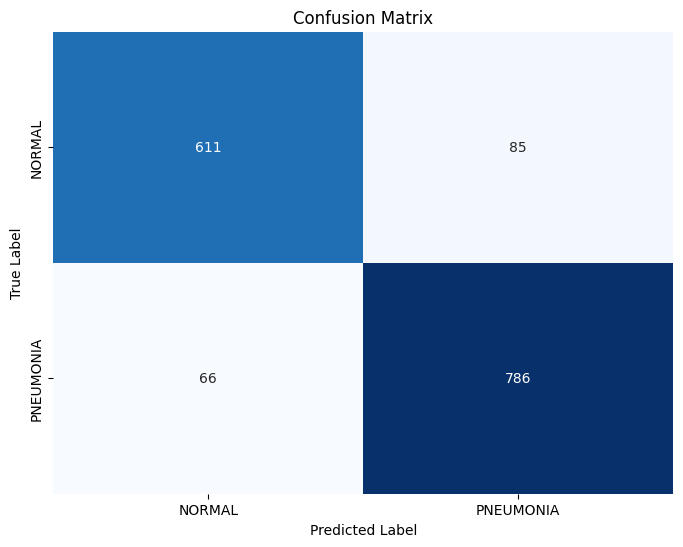

1/1 [==============================] - 0s 21ms/step


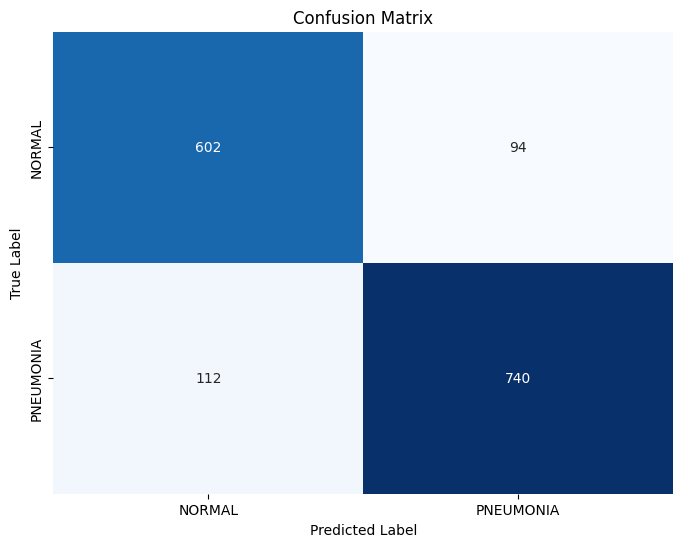

1/1 [==============================] - 0s 23ms/step


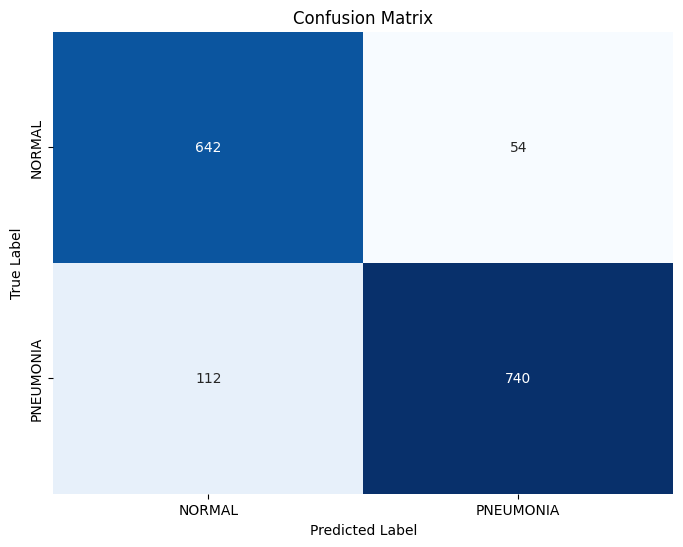

1/1 [==============================] - 0s 23ms/step


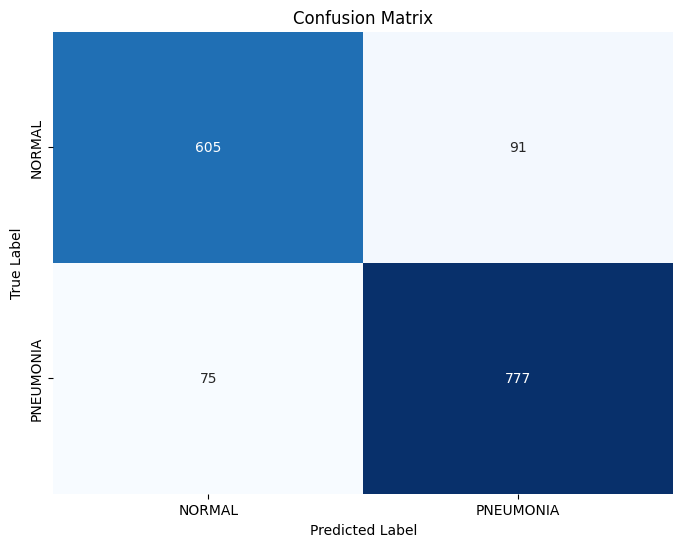

In [150]:
models = [model_1, model_2, model_3, model_4]

for model in models:
    show_cm(model)

## Resutls based on the confusion matrix
Best performing model is _model_1_. Next is _model_4_.

Models _2_ and _3_ show much worse performance based on the number of __False Positives__.

In [145]:
# Create a dataframe with filenames of all images in the dataset in the first column and labels in the second
test_df = pd.DataFrame(columns=['filename', 'label'])

for subdir, dirs, files in os.walk(test_path):
    for file in files:
        # Get the label from the subdirectory name
        label = subdir.split(os.path.sep)[-1]
        # Add the filename and label to the dataframe
        test_df = pd.concat([test_df, pd.DataFrame({'filename': os.path.join(subdir, file), 'label': label}, index=[0])], ignore_index=True)

# Convert PNEUMONIA to 1 and NORMAL to 0 in label column
test_df['label'] = test_df['label'].apply(lambda x: 1 if x == 'PNEUMONIA' else 0)
test_df.head()

,filename,label
0,/content/images/test/PNEUMONIA/person1659_viru...,1
1,/content/images/test/PNEUMONIA/person47_virus_...,1
2,/content/images/test/PNEUMONIA/person947_virus...,1
3,/content/images/test/PNEUMONIA/person1_virus_1...,1
4,/content/images/test/PNEUMONIA/person108_bacte...,1


In [151]:
# Create a list to store predictions for each model
model_predictions = []

# Iterate through models
for model in models:
    # Create a list to store predictions for the current model
    model_pred = []
    # Iterate through test dataset
    for images, labels in test_ds:
        # Make predictions
        predictions = model.predict(images)
        # Get predicted labels
        predicted_labels = np.argmax(predictions, axis=1)
        # Add predicted labels to the list
        model_pred.extend(predicted_labels)
    # Add the predictions for the current model to the list of all predictions
    model_predictions.append(model_pred)

# Add the predictions to the test_df
for i, model_name in enumerate(models_df['model']):
    test_df[model_name] = model_predictions[i]

test_df.head()

1/1 [==============================] - 0s 22ms/step


,filename,label,model_1,model_2,model_3,model_4
0,/content/images/test/PNEUMONIA/person1659_viru...,1,1,1,1,1
1,/content/images/test/PNEUMONIA/person47_virus_...,1,0,0,1,1
2,/content/images/test/PNEUMONIA/person947_virus...,1,0,1,0,0
3,/content/images/test/PNEUMONIA/person1_virus_1...,1,0,0,0,1
4,/content/images/test/PNEUMONIA/person108_bacte...,1,1,1,1,1


In [152]:
# Calculate recall, precision and f1 for each model
for model_name in models_df['model']:
    # Recall
    recall = recall_score(test_df['label'], test_df[model_name])
    # Precision
    precision = precision_score(test_df['label'], test_df[model_name])
    # F1
    f1 = f1_score(test_df['label'], test_df[model_name])
    # Add results to the dataframe
    models_df.loc[models_df['model'] == model_name, 'recall'] = recall
    models_df.loc[models_df['model'] == model_name, 'precision'] = precision
    models_df.loc[models_df['model'] == model_name, 'f1'] = f1

# Print the updated dataframe
models_df

,model,accuracy,loss,recall,precision,f1
0,model_1,0.902455,0.386641,0.562207,0.549943,0.556007
1,model_2,0.866925,0.364189,0.550469,0.562350,0.556346
2,model_3,0.892765,0.350410,0.515258,0.552897,0.533414
3,model_4,0.892765,0.364596,0.561033,0.550691,0.555814


# Summary
The best performing model is _model_1_ which has the best __accuracy__ and __recall__ which are the most important metrics for the medical test, as well as the best confusion matrix.

It will be used in later production.